# Casestudy CRC :  SRM colorectal cancer data

This is case study CRC in  in this paper. The dataset is available at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4568950/. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import set_matplotlib_formats
from matplotlib.lines import Line2D
from pgmpy.estimators import PC
import networkx as nx

# from realms import simulate

set_matplotlib_formats("svg")


Plasma samples were subjected to parallel N-glycoprotein
extraction in a 96-well format, followed by targeted Selected Reaction Monitoring (SRM)
quantification of 67 candidate proteins by SRM. PSMs were summarized into protein-level
summaries by MSstatsTMT. 

### Step 1: Get pilot/historical data from past similar experiment

In [27]:
data = pd.read_csv('SCMS/data/meldataclean.csv')
data = data.drop('Unnamed: 0',axis=1)
data.head()

,DHX15_HUMAN,G3P_HUMAN,HSPB1_HUMAN,ENOA_HUMAN,NPM_HUMAN,HS90A_HUMAN,HNRPC_HUMAN,HS90B_HUMAN,ANXA5_HUMAN,H14_HUMAN,...,RS23_HUMAN,TYB10_HUMAN,RS4X_HUMAN,H4_HUMAN,RL23_HUMAN,HNRPU_HUMAN,PSME1_HUMAN,EF1A1_HUMAN,PARK7_HUMAN,BioReplicate
0,9.368920,10.167968,11.777913,10.920721,10.906010,10.335122,10.634692,11.553578,9.207920,11.360237,...,11.271160,13.482704,10.378637,10.531847,11.752979,10.405871,9.219097,9.846337,10.133048,0
1,9.489853,10.180817,10.818609,10.871440,10.889861,10.396813,10.330118,11.014594,9.597437,11.422972,...,11.973722,13.070122,10.517606,10.645003,11.238343,10.667812,9.916110,10.187284,10.553502,0
2,9.766231,10.706837,11.750412,12.442845,12.427367,11.026080,10.609098,11.076089,11.808549,11.638560,...,11.030231,12.587978,11.215166,11.626250,10.962162,11.166272,10.285818,10.185965,11.767151,1
3,10.048671,9.803506,11.674774,11.818872,11.919689,10.957868,10.552753,11.523332,11.582727,11.269536,...,11.456930,12.264780,9.961714,11.158386,10.938503,11.007130,9.975372,10.427651,10.365379,1
4,10.155918,10.459226,12.510192,11.998972,11.544736,11.230470,10.727446,11.372416,11.370214,11.708166,...,11.388214,11.661693,10.575094,11.426903,12.067473,11.155149,10.308901,9.994868,10.841175,1


### Step2(optional): Prior Knowledge Network creation 


The figure below shows the prior knowledge network queried from INDRA. It comprises 1300 nodes, connected by a total of 6567 directed edges.

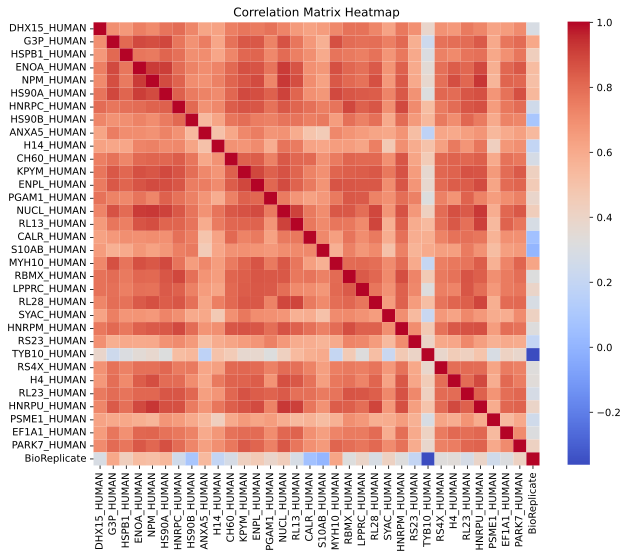

In [29]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:

corr_matrix = data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
# Plot the highest correlated pairs
# for pair in highest_correlated_pairs.head():
#     col1, col2 = pair
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=data[col1], y=data[col2])
#     plt.title(f'Scatter Plot of {col1} vs {col2}')
#     plt.xlabel(col1)
#     plt.ylabel(col2)
#     plt.show()

In [34]:
import pandas as pd

# Assuming you have your dataset in a CSV file named 'data.csv', you can read it into a pandas DataFrame


# Compute the correlation matrix
correlation_matrix = data.corr()

# Extract upper triangular part of the correlation matrix (excluding diagonal)
upper_triangular = correlation_matrix.where(
    pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the pairs of columns with the highest correlation coefficients
highest_correlated_pairs = upper_triangular.unstack().sort_values(ascending=False).dropna()

# Get the top correlated pairs
top_correlated_pairs = highest_correlated_pairs.head(20)

# Extract the column names from the top correlated pairs
top_correlated_cols = [pair[0] for pair in top_correlated_pairs.index] + [pair[1] for pair in top_correlated_pairs.index]

# Remove duplicates and keep the unique column names
top_correlated_cols = list(set(top_correlated_cols))

# Print the list of top correlated columns
print("Top correlated columns:", top_correlated_cols)

# Filter the correlation matrix to include only the top correlated columns
correlation_matrix_top = correlation_matrix.loc[top_correlated_cols, top_correlated_cols]

# Print out the correlation matrix for the top correlated columns
print("\nCorrelation matrix for top correlated columns:")
print(correlation_matrix_top)


Top correlated columns: ['NUCL_HUMAN', 'ENPL_HUMAN', 'NPM_HUMAN', 'HS90A_HUMAN', 'HNRPM_HUMAN', 'MYH10_HUMAN', 'RL13_HUMAN', 'RL28_HUMAN', 'HNRPU_HUMAN', 'KPYM_HUMAN', 'ENOA_HUMAN', 'HNRPC_HUMAN', 'G3P_HUMAN', 'RBMX_HUMAN']

Correlation matrix for top correlated columns:
             NUCL_HUMAN  ENPL_HUMAN  NPM_HUMAN  HS90A_HUMAN  HNRPM_HUMAN  \
NUCL_HUMAN     1.000000    0.880464   0.925387     0.902705     0.866351   
ENPL_HUMAN     0.880464    1.000000   0.878124     0.877184     0.855253   
NPM_HUMAN      0.925387    0.878124   1.000000     0.878374     0.844530   
HS90A_HUMAN    0.902705    0.877184   0.878374     1.000000     0.849583   
HNRPM_HUMAN    0.866351    0.855253   0.844530     0.849583     1.000000   
MYH10_HUMAN    0.848020    0.859521   0.847333     0.884571     0.794580   
RL13_HUMAN     0.901621    0.822451   0.875422     0.814884     0.824839   
RL28_HUMAN     0.892879    0.850176   0.871820     0.835646     0.824511   
HNRPU_HUMAN    0.922906    0.878229   0.9264

/var/folders/sp/pn9txhp11mn2pyld318tpy080000gn/T/ipykernel_31927/2229610576.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool))


In [24]:
import pandas as pd

# Drop rows with missing values
data_no_missing_rows = data.dropna()

# Find columns without NaN correlation after dropping missing values
columns_no_nan_correlation = data_no_missing_rows.columns[(data_no_missing_rows.corr() != pd.np.nan).all()]

# Select only columns without NaN correlation
data_no_nan_correlation = data_no_missing_rows[columns_no_nan_correlation]

# Compute the correlation matrix for columns without NaN correlation
correlation_matrix_no_nan = data_no_nan_correlation.corr()

# Extract upper triangular part of the correlation matrix (excluding diagonal)
upper_triangular = correlation_matrix_no_nan.where(
    pd.np.triu(pd.np.ones(correlation_matrix_no_nan.shape), k=1).astype(bool))

# Find the pairs of columns with the highest correlation coefficients
highest_correlated_pairs = upper_triangular.unstack().sort_values(ascending=False).dropna()

# Get the top correlated pairs
top_correlated_pairs = highest_correlated_pairs.head()

# Extract the column names from the top correlated pairs
top_correlated_cols = [pair[0] for pair in top_correlated_pairs.index] + [pair[1] for pair in top_correlated_pairs.index]

# Remove duplicates and keep the unique column names
top_correlated_cols = list(set(top_correlated_cols))

# Print the list of top correlated columns without NaN correlation
print("Top correlated columns without NaN correlation:", top_correlated_cols)

# Filter the correlation matrix to include only the top correlated columns without NaN correlation
correlation_matrix_top_no_nan = correlation_matrix_no_nan.loc[top_correlated_cols, top_correlated_cols]

# Print out the correlation matrix for the top correlated columns without NaN correlation
print("\nCorrelation matrix for top correlated columns without NaN correlation:")
print(correlation_matrix_top_no_nan)


/var/folders/sp/pn9txhp11mn2pyld318tpy080000gn/T/ipykernel_31927/2442005389.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  columns_no_nan_correlation = data_no_missing_rows.columns[(data_no_missing_rows.corr() != pd.np.nan).all()]
/var/folders/sp/pn9txhp11mn2pyld318tpy080000gn/T/ipykernel_31927/2442005389.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.triu(pd.np.ones(correlation_matrix_no_nan.shape), k=1).astype(bool))


Top correlated columns without NaN correlation: []

Correlation matrix for top correlated columns without NaN correlation:
Empty DataFrame
Columns: []
Index: []


## Step 3: Simulating realistic data using copula model 

In [ ]:
dataset = df_with_0
# dataset = egf
from copulas.multivariate import GaussianMultivariate

for i in range(100):
    model = GaussianMultivariate()
    model.fit(dataset)

    synthetic = model.sample(len(dataset))
    synthetic.to_csv('crc/copula/crc0_gm_copula_'+str(i)+'.csv',index=False)


## Step 4: Evaluating realism

#### Visual Metrics

In [ ]:
import plotly.express as px
# df = px.data.tips()
df = sim
fig = px.histogram(df, x="CP" , color="Condition",facet_col="Method",
                  marginal="box", histnorm='probability density')
fig.show()

#### Statistical Metrics

#### Machine Learning Efficacy

#### Similarity Score

## Step 5: Selecting sample size appropriate for downstream application

#### Class Prediction

##### Class Discovery

##### Class Comparison